In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def load_dataset(file: str):
    dataFrame = pd.read_csv(file)

    return dataFrame


data = load_dataset("data/weatherAUS.csv")
print(data.shape)
data.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

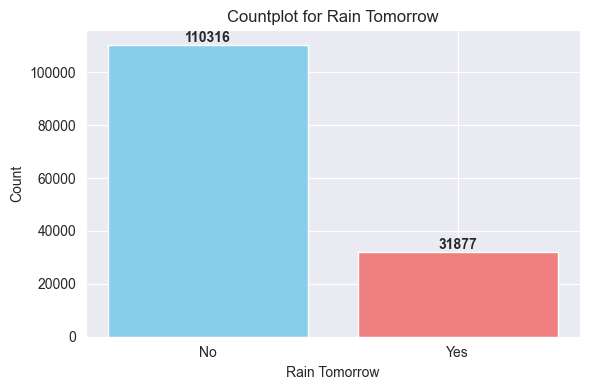

In [49]:
# Countplot using Matplotlib
rain_tomorrow_counts = data["RainTomorrow"].value_counts()
categories = rain_tomorrow_counts.index
counts = rain_tomorrow_counts.values

# define colors for each bar
colors = ['skyblue', 'lightcoral']

# create a bar plot with different colors
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, counts, color=colors)

# Annotate bars with count values
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1,
             f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels and title
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.title('Countplot for Rain Tomorrow')
plt.tight_layout()

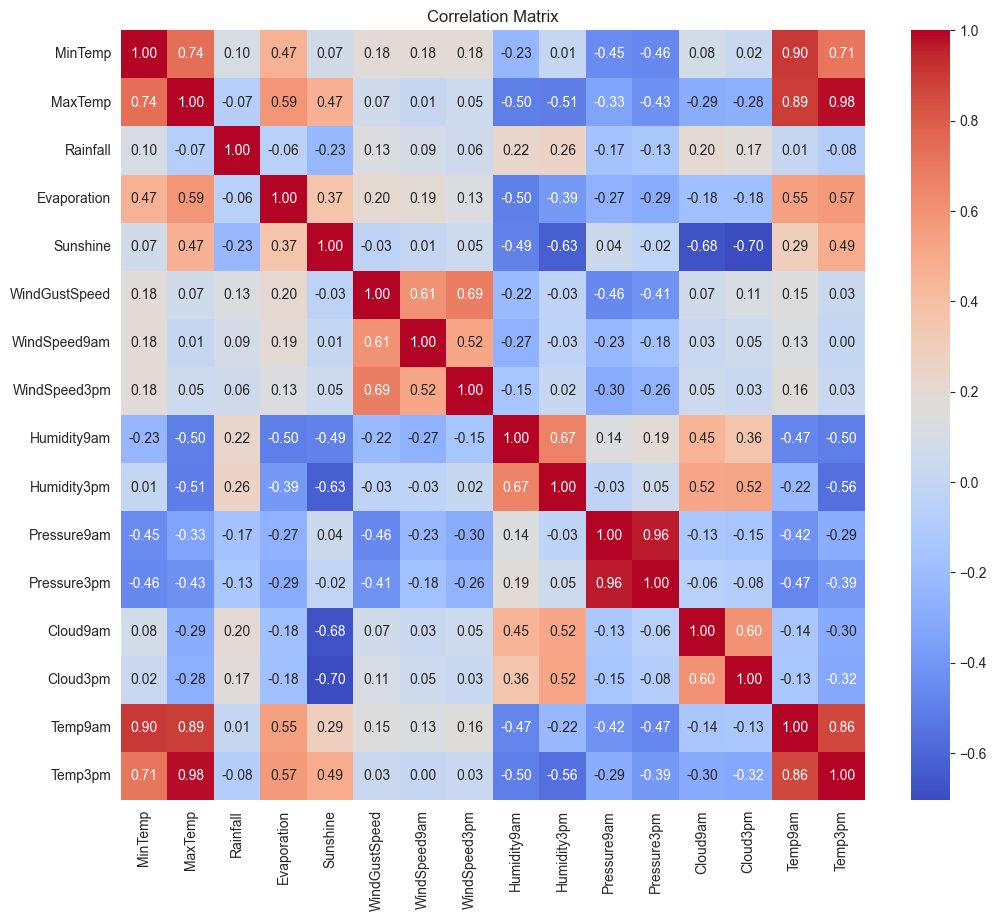

In [50]:
# Correlation matrix, using matplotlib
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# numeric_data = data.select_dtypes(include=[np.number])
# corrmat = numeric_data.corr()
# cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
# plt.subplots(figsize=(18,18))
# sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [51]:
# separate numerical and categorical columns

def extract_numerical_and_categorical(data: pd.DataFrame):
    numerical_data, categorical_data = None, None

    numerical_data = data.select_dtypes(include=['int64', 'float64'])
    categorical_data = data.select_dtypes(include=['object'])

    print(f'There are {numerical_data.shape[1]} numerical columns\n'
          f'Numerical columns: {numerical_data.columns}')
    print(f'There are {categorical_data.shape[1]} categorical columns\n'
          f'Categorical columns: {categorical_data.columns}')

    return numerical_data, categorical_data


numerical_data, categorical_data = extract_numerical_and_categorical(data)

There are 16 numerical columns
Numerical columns: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
There are 7 categorical columns
Categorical columns: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [52]:
numerical_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [53]:
categorical_data.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [54]:
# check for missing values in numerical data

numerical_data.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [55]:
# check for missing values in categorial data
categorical_data.isnull().sum()


Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [56]:
# parse date, extract year, month, day

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop('Date', axis=1, inplace=True)
data.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [57]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

dummy_location = pd.get_dummies(data['Location'], drop_first=True)
dummy_location.head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy_WindGustDir = pd.get_dummies(data['WindGustDir'], drop_first=True, dummy_na=True)
dummy_WindGustDir.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [59]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

dummy_counts = pd.get_dummies(data['WindGustDir'], drop_first=True, dummy_na=True).sum(axis=0)
dummy_counts

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

In [60]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy_WindDir9am = pd.get_dummies(data['WindDir9am'], drop_first=True, dummy_na=True)
dummy_WindDir9am.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

dummy_counts = pd.get_dummies(data['WindDir9am'], drop_first=True, dummy_na=True).sum(axis=0)
dummy_counts

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

In [62]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy_WindDir3pm = pd.get_dummies(data['WindDir3pm'], drop_first=True, dummy_na=True)
dummy_WindDir3pm.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [63]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

dummy_counts = pd.get_dummies(data['WindDir3pm'], drop_first=True, dummy_na=True).sum(axis=0)
dummy_counts

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

In [64]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy_RainToday = pd.get_dummies(data['RainToday'], drop_first=True, dummy_na=True)
dummy_RainToday.head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [65]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

dummy_counts = pd.get_dummies(data['RainToday'], drop_first=True, dummy_na=True).sum(axis=0)
dummy_counts

Yes    31880
NaN     3261
dtype: int64

In [66]:
# view summary statistics in numerical data

numerical_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


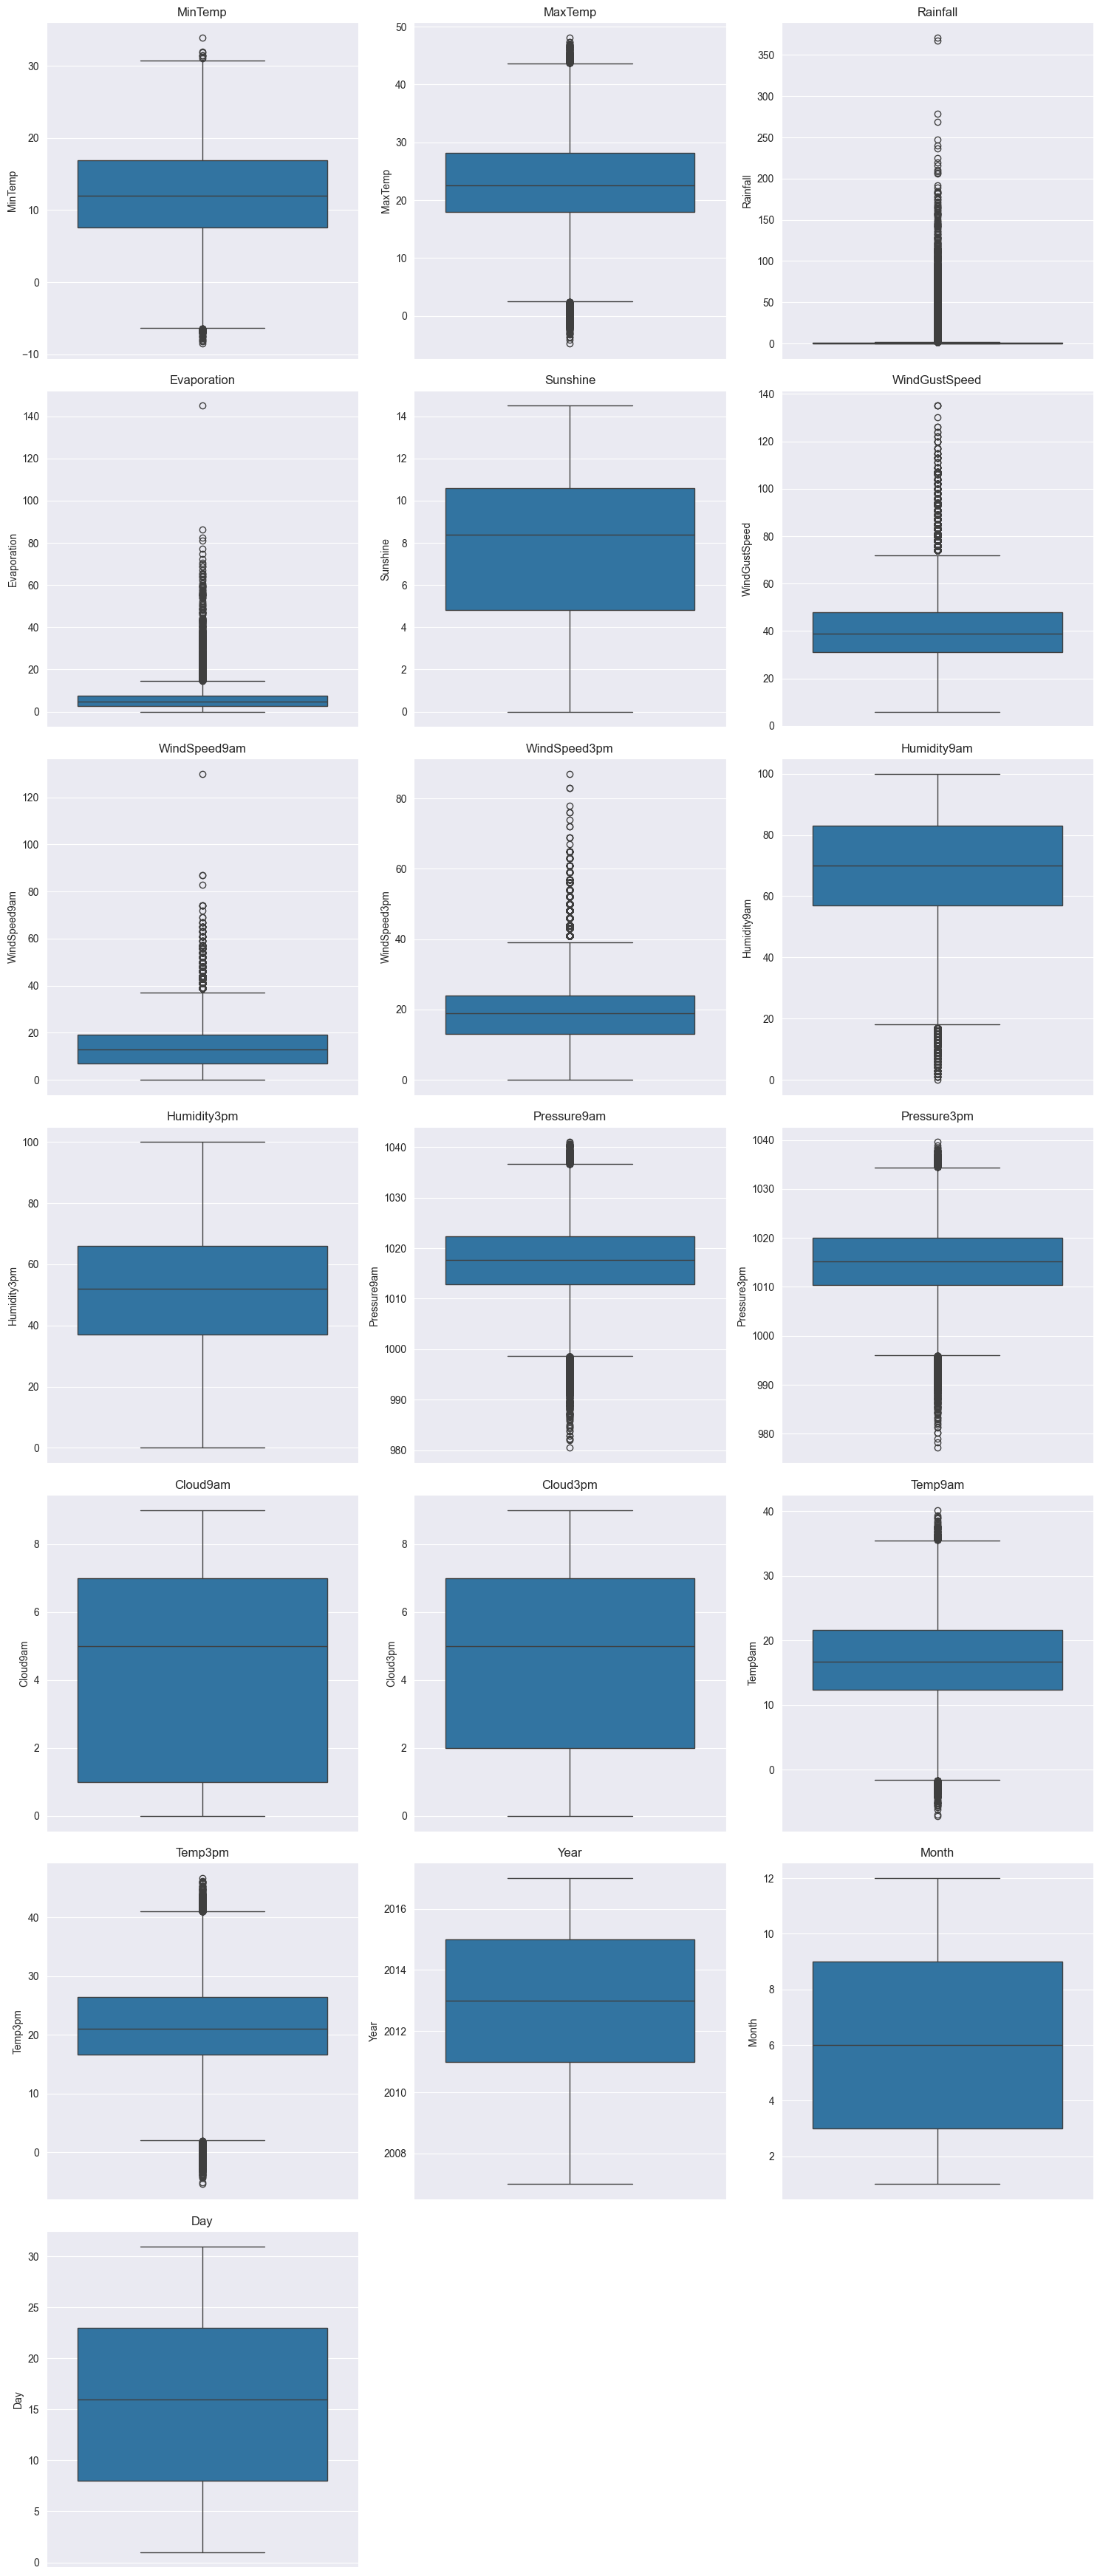

In [67]:
from utils import plot_outlier_boxplots

# plot boxplots to visualize outliers
plot_outlier_boxplots(data)

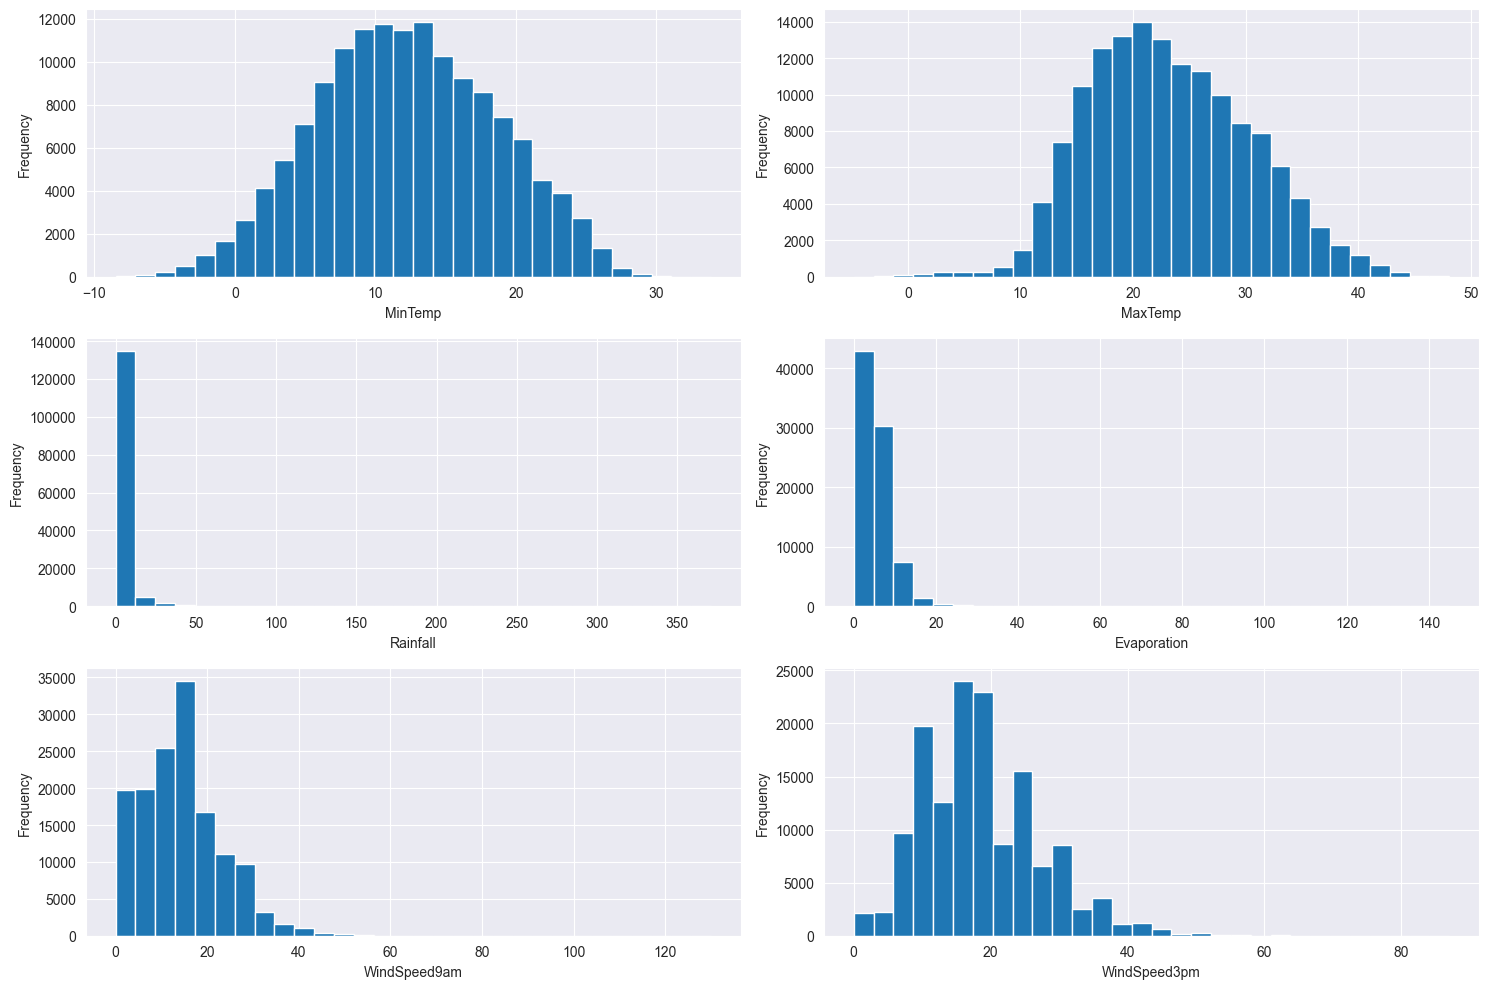

In [68]:
# plot histograms to visualize distribution

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Subplot (1,1)
numerical_data['MinTemp'].hist(bins=30, ax=axes[0, 0])
axes[0, 0].set_title('')
axes[0, 0].set_xlabel('MinTemp')
axes[0, 0].set_ylabel('Frequency')

# Subplot (1,2)
numerical_data['MaxTemp'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('')
axes[0, 1].set_xlabel('MaxTemp')
axes[0, 1].set_ylabel('Frequency')

# Subplot (2,1)
numerical_data['Rainfall'].hist(bins=30, ax=axes[1, 0])
axes[1, 0].set_title('')
axes[1, 0].set_xlabel('Rainfall')
axes[1, 0].set_ylabel('Frequency')

# Subplot (2,2)
numerical_data['Evaporation'].hist(bins=30, ax=axes[1, 1])
axes[1, 1].set_title('')
axes[1, 1].set_xlabel('Evaporation')
axes[1, 1].set_ylabel('Frequency')

# Subplot (3,1)
numerical_data['WindSpeed9am'].hist(bins=30, ax=axes[2, 0])
axes[2, 0].set_title('')
axes[2, 0].set_xlabel('WindSpeed9am')
axes[2, 0].set_ylabel('Frequency')

# Subplot (3,2)
numerical_data['WindSpeed3pm'].hist(bins=30, ax=axes[2, 1])
axes[2, 1].set_title('')
axes[2, 1].set_xlabel('WindSpeed3pm')
axes[2, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [69]:
# find outlier for Rainfall variable

IQR = data['Rainfall'].quantile(0.75) - data['Rainfall'].quantile(0.25)
lower_bound = data['Rainfall'].quantile(0.25) - (IQR * 3)
upper_bound = data['Rainfall'].quantile(0.75) + (IQR * 3)

print(f'Rainfall outliers are values < {lower_bound} or > {upper_bound}')


Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [70]:
# find outlier for Evaporation variable

IQR = data['Evaporation'].quantile(0.75) - data['Evaporation'].quantile(0.25)
lower_bound = data['Evaporation'].quantile(0.25) - (IQR * 3)
upper_bound = data['Evaporation'].quantile(0.75) + (IQR * 3)

print(f'Evaporation outliers are values < {lower_bound} or > {upper_bound}')

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [71]:
# find outlier for WindSpeed9am variable

IQR = data['WindSpeed9am'].quantile(0.75) - data['WindSpeed9am'].quantile(0.25)
lower_bound = data['WindSpeed9am'].quantile(0.25) - (IQR * 3)
upper_bound = data['WindSpeed9am'].quantile(0.75) + (IQR * 3)

print(f'WindSpeed9am outliers are values < {lower_bound} or > {upper_bound}')

WindSpeed9am outliers are values < -29.0 or > 55.0


In [72]:
# find outlier for WindSpeed3pm variable

IQR = data['WindSpeed3pm'].quantile(0.75) - data['WindSpeed3pm'].quantile(0.25)
lower_bound = data['WindSpeed3pm'].quantile(0.25) - (IQR * 3)
upper_bound = data['WindSpeed3pm'].quantile(0.75) + (IQR * 3)

print(f'WindSpeed3pm outliers are values < {lower_bound} or > {upper_bound}')

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [73]:
### DATA PREPROCESSING AND SPLITTING ###

In [74]:
# Declare feature vector and target variable

X = data.drop(['RainTomorrow'], axis=1).copy()
y = data['RainTomorrow'].copy()

In [75]:
def split_data_num_cat(data: pd.DataFrame):
    data_numerical, data_categorical = None, None

    data_numerical = data.select_dtypes(include=['int32', 'int64', 'float64'])
    data_categorical = data.select_dtypes(include=['object'])

    return data_numerical, data_categorical


def split_data_train_test(X, y, ratio=0.8):
    X_train, y_train, X_test, y_test = None, None, None, None

    X_train = X[:int(ratio * X.shape[0])]
    y_train = y[:int(ratio * y.shape[0])]
    X_test = X[int(ratio * X.shape[0]):]
    y_test = y[int(ratio * y.shape[0]):]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = split_data_train_test(X, y)
X_train_numerical, X_train_categorical = split_data_num_cat(X_train)
X_test_numerical, X_test_categorical = split_data_num_cat(X_test)

In [76]:
# check percentage of missing data for each column

print(X_train_numerical.isnull().mean().round(2))
print(X_train_categorical.isnull().mean().round(2))

MinTemp          0.01
MaxTemp          0.01
Rainfall         0.02
Evaporation      0.44
Sunshine         0.49
WindGustSpeed    0.08
WindSpeed9am     0.01
WindSpeed3pm     0.02
Humidity9am      0.02
Humidity3pm      0.03
Pressure9am      0.09
Pressure3pm      0.09
Cloud9am         0.38
Cloud3pm         0.40
Temp9am          0.01
Temp3pm          0.02
Year             0.00
Month            0.00
Day              0.00
dtype: float64
Location       0.00
WindGustDir    0.08
WindDir9am     0.08
WindDir3pm     0.03
RainToday      0.02
dtype: float64


In [77]:
# replace missing numerical values in X_train, X_test with column median value in X_train

def replace_missing_values(data: pd.DataFrame):
    data_numerical, data_categorical = split_data_num_cat(data)

    col_median_numerical = data_numerical.mean().round(2)
    col_median_categorical = data_categorical.mode().iloc[0]

    data_numerical_filled = data_numerical.fillna(col_median_numerical)
    data_categorical_filled = data_categorical.fillna(col_median_categorical)

    return pd.concat([data_numerical_filled, data_categorical_filled], axis=1)


data_filled = replace_missing_values(data)
data_filled.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

In [78]:
# outlier removal for numerical data
# https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff

def determine_outlier_threshold(data: pd.DataFrame, column: str, multiplier: float = 1.5):
    """Calculate lower and upper bounds for outliers using IQR."""
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_bound = data[column].quantile(0.25) - (IQR * multiplier)
    upper_bound = data[column].quantile(0.75) + (IQR * multiplier)
    return lower_bound, upper_bound


def replace_outliers(data: pd.DataFrame, multiplier: float = 1.5, verbose: bool = True):
    data_copy = data.copy()
    data_numerical, _ = split_data_num_cat(data)

    for column in data_numerical.columns:
        lower_bound, upper_bound = determine_outlier_threshold(data_copy, column, multiplier)

        if verbose:
            print(f'{column} outliers are values < {lower_bound} or > {upper_bound}')

        data_copy[column] = data_copy[column].clip(lower=lower_bound, upper=upper_bound)

    return data_copy


data_no_outliers = replace_outliers(data_filled, 3)
data_no_outliers.max()

MinTemp outliers are values < -19.600000000000005 or > 44.10000000000001
MaxTemp outliers are values < -12.599999999999998 or > 58.8
Rainfall outliers are values < -3.0 or > 4.0
Evaporation outliers are values < -0.40999999999999925 or > 9.879999999999999
Sunshine outliers are values < 4.340000000000003 or > 11.969999999999995
WindGustSpeed outliers are values < -14.0 or > 91.0
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0
Humidity9am outliers are values < -21.0 or > 161.0
Humidity3pm outliers are values < -47.0 or > 149.0
Pressure9am outliers are values < 988.6000000000001 or > 1046.6999999999998
Pressure3pm outliers are values < 986.2000000000002 or > 1044.2999999999997
Cloud9am outliers are values < -6.0 or > 15.0
Cloud3pm outliers are values < -2.0 or > 12.0
Temp9am outliers are values < -15.299999999999997 or > 49.099999999999994
Temp3pm outliers are values < -11.8 or > 54.7
Year outliers are values < 1999.0 or > 2027.0
Month

MinTemp             33.9
MaxTemp             48.1
Rainfall             4.0
Evaporation         9.88
Sunshine           11.97
WindGustSpeed       91.0
WindSpeed9am        55.0
WindSpeed3pm        57.0
Humidity9am        100.0
Humidity3pm        100.0
Pressure9am       1041.0
Pressure3pm       1039.6
Cloud9am             9.0
Cloud3pm             9.0
Temp9am             40.2
Temp3pm             46.7
Year                2017
Month                 12
Day                   31
Location         Woomera
WindGustDir          WSW
WindDir9am           WSW
WindDir3pm           WSW
RainToday            Yes
RainTomorrow         Yes
dtype: object

In [79]:
import category_encoders as ce


# encode categorical variables
# One Hot Encoding for categorical variables
def encode_categorical(data: pd.DataFrame, columns: list) -> pd.DataFrame:
    data_encoded = pd.get_dummies(data, columns=columns, drop_first=True)

    return data_encoded


def encode_categorical2(data_train: pd.DataFrame, data_test: pd.DataFrame, cols: list) -> tuple[
    pd.DataFrame, pd.DataFrame]:
    encoder = ce.OneHotEncoder(cols=cols, use_cat_names=True)
    return_train_data = encoder.fit_transform(data_train)
    return_test_data = encoder.transform(data_test)

    return return_train_data, return_test_data


# data_encoded = encode_categorical(data_no_outliers, ['RainToday'])
# data_encoded.head()

# select only rain today to encode
data_encoded2, _ = encode_categorical2(data_no_outliers, data_no_outliers, ['RainToday'])
data_encoded2.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Year,Month,Day,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_No,RainToday_Yes,RainTomorrow
0,13.4,22.9,0.6,5.47,7.61,44.0,20.0,24.0,71.0,22.0,...,2008,12,1,Albury,W,W,WNW,1,0,No
1,7.4,25.1,0.0,5.47,7.61,44.0,4.0,22.0,44.0,25.0,...,2008,12,2,Albury,WNW,NNW,WSW,1,0,No
2,12.9,25.7,0.0,5.47,7.61,46.0,19.0,26.0,38.0,30.0,...,2008,12,3,Albury,WSW,W,WSW,1,0,No
3,9.2,28.0,0.0,5.47,7.61,24.0,11.0,9.0,45.0,16.0,...,2008,12,4,Albury,NE,SE,E,1,0,No
4,17.5,32.3,1.0,5.47,7.61,41.0,7.0,20.0,82.0,33.0,...,2008,12,5,Albury,W,ENE,NW,1,0,No


In [80]:
data_no_outliers.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,0.831441,5.233953,7.852952,40.011773,14.038833,18.658696,68.880816,51.539143,1017.650642,1015.256923,4.448437,4.509959,16.990624,21.683306,2012.769751,6.399615,15.712258
std,6.365750,7.088124,1.435505,2.176988,2.036643,13.011428,8.834885,8.696751,18.854765,20.471189,6.725237,6.661093,2.265605,2.092954,6.449221,6.850057,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,4.340000,6.000000,0.000000,0.000000,0.000000,0.000000,988.600000,986.200000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,4.000000,9.880000,11.970000,91.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [81]:
# feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def scale_features(data_train: pd.DataFrame, data_test: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    scaler = StandardScaler()
    return_train_data_scaled = scaler.fit_transform(data_train)
    return_test_data_scaled = scaler.transform(data_test)

    # reconstruct DataFrame with original column names and index
    return_train_data_scaled_df = pd.DataFrame(return_train_data_scaled, columns=data_train.columns, index=data_train.index)
    return_test_data_scaled_df = pd.DataFrame(return_test_data_scaled, columns=data_test.columns, index=data_test.index)
    return return_train_data_scaled_df, return_test_data_scaled_df

In [82]:
# PROCESS ENTIRE DATA AND RETURN NUMPY ARRAYS
def process_data(data: pd.DataFrame) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    # fill missing values
    data_filled = replace_missing_values(data)

    X = data_filled.drop(['RainTomorrow'], axis=1).copy()
    y = data_filled['RainTomorrow'].copy()

    # remove outliers
    X_no_outliers = replace_outliers(X, 3, verbose=False)

    # split data into train and test
    X_train, y_train, X_test, y_test = split_data_train_test(X_no_outliers, y)

    # split data into numerical and categorical
    X_train_numerical, X_train_categorical = split_data_num_cat(X_train)
    X_test_numerical, X_test_categorical = split_data_num_cat(X_test)

    # encode categorical variables
    # X_train_encoded, X_test_encoded = encode_categorical2(X_train_categorical, X_test_categorical, ['RainToday'])
    X_train_encoded, X_test_encoded = encode_categorical2(X_train_categorical, X_test_categorical,
                                                          ['RainToday', 'Location', 'WindGustDir', 'WindDir9am',
                                                           'WindDir3pm'])
    y_train_encoded, y_test_encoded = encode_categorical2(y_train, y_test, ['RainTomorrow'])
    y_train = y_train_encoded['RainTomorrow_Yes']
    y_test = y_test_encoded['RainTomorrow_Yes']

    # scale features
    X_train_scaled, X_test_scaled = scale_features(X_train_numerical, X_test_numerical)

    # create final datasets
    X_train = pd.concat([X_train_scaled, X_train_encoded], axis=1)
    X_test = pd.concat([X_test_scaled, X_test_encoded], axis=1)
    # X_train = pd.concat([X_train_scaled], axis=1)
    # X_test = pd.concat([X_test_scaled], axis=1)
    
    # transform to numpy arrays
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()

    # add intercept to X_train and X_test
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = process_data(data)

print('The shape of the training set is:')
print(X_train.shape, y_train.shape)
print('The shape of the test set is:')
print(X_test.shape, y_test.shape)

The shape of the training set is:
(116368, 109) (116368,)
The shape of the test set is:
(29092, 109) (29092,)


In [97]:
import import_ipynb
from logistic_regression import evaluate_algorithm, cross_validate_logistic_regression, Regularization, bagging_logistic_regression

# TRAIN AND TEST ALGORITHM

w = np.random.randn(X_train.shape[1])
alpha = 0.00001
no_iterations = 100
lambdas = [0.001, 0.01, 0.1, 1, 10]
regularization = Regularization.ELASTIC_NET
best_lambda = cross_validate_logistic_regression(X_train,
                                                 y_train,
                                                 lambdas,
                                                 alpha,
                                                 no_iterations,
                                                 regularization,
                                                 k=5)

print(f'Best found lambda for regularization is {best_lambda}')

Best found lambda for regularization is 1


Stochastic Gradient Descent average cost on test: 0.38387389180728326
Stochastic Gradient Descent accuracy on test: 0.8393716485631789
Stochastic Gradient Descent precision on test: 0.6238063513213413
Stochastic Gradient Descent recall on test: 0.4853144436765722
Stochastic Gradient Descent F1 Score on test: 0.5459139053541929


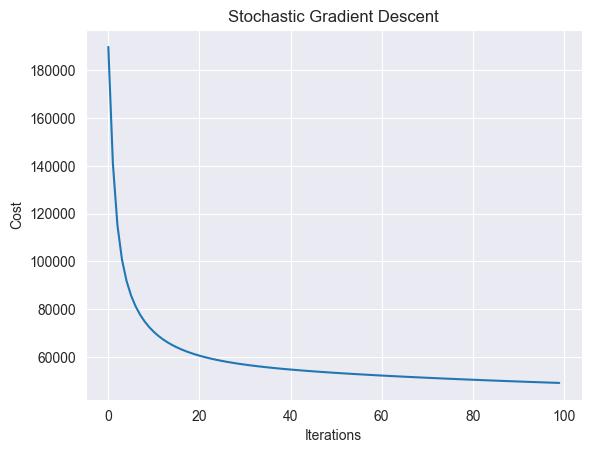

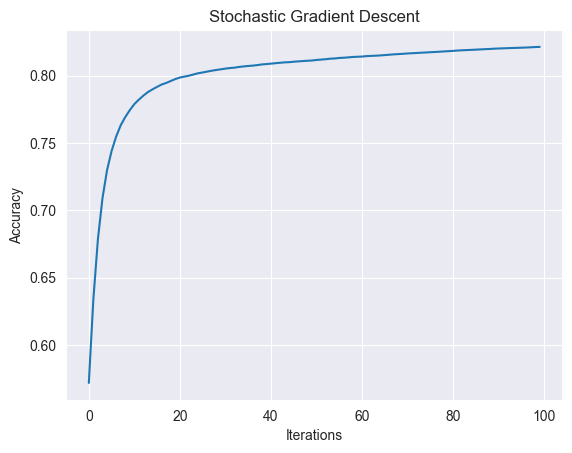

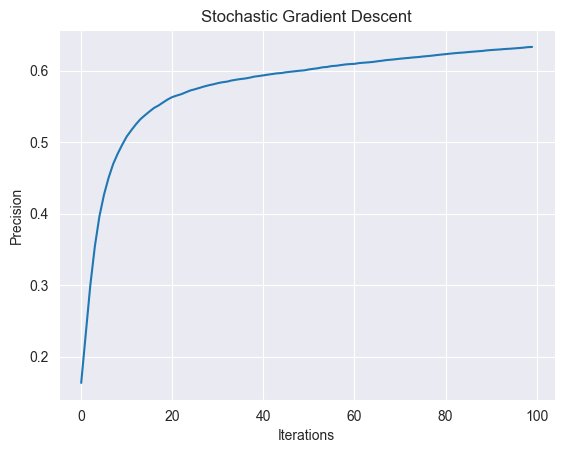

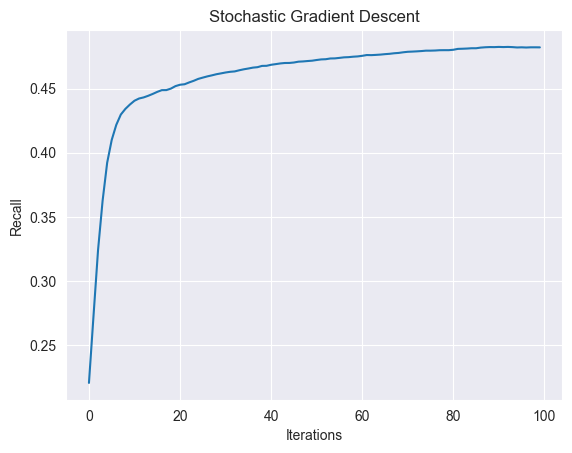

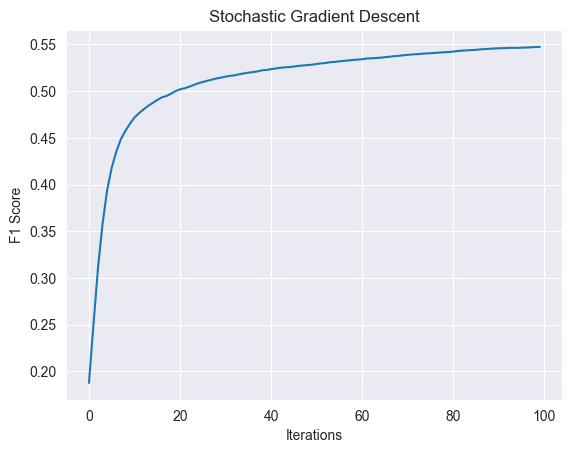

Accuracy of the bagging classifier is: 0.8633644988312938
Finish


In [98]:
# evaluate_algorithm(X_train, y_train, X_test, y_test, w, alpha, no_iterations)
evaluate_algorithm(X_train, y_train, X_test, y_test, w, alpha, no_iterations, regularization, best_lambda)

# BAGGING
n_estimators = 10
# final_predictions = bagging_logistic_regression(X_train, y_train, X_test,y_test, n_estimators, alpha, no_iterations)
final_predictions = bagging_logistic_regression(X_train, y_train, X_test, y_test, n_estimators, alpha, no_iterations, regularization, best_lambda)

# evaluate the final predictions
accuracy = np.mean(final_predictions)
print(f'Accuracy of the bagging classifier is: {accuracy}')

print('Finish')